## 과대적합
모델이 성능이 최고지에 다다랐다가 감소

## 머신러닝의 근본적인 이슈
최적화vs일반화
최적화
가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정
일반화
훈련된 모델이 이전에 본적 없는 데이터에서 얼마나 잘 수행되는지 의미
-->모델을 만드는 목적은 좋은 일반화 성능을 얻는 것이지만 일반화 성능을 제어할 방법은 없고 훈련 데이터를 기반으로 모델을 조정할 수 있다. 

## 과소적합
훈련데이터의 손실이 낮아질수록 테스트 데이터의 손실도 낮아지는 현상이 발생하는 경우
네트워크가 훈련 데이터에 있는 관련 특성을 모두 학습하지 못했을 경우

### 규제: 과대적합을 피하는 과정


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

##  네트워크 축소

과대적합을 막는 가장 단순한 방법 --> 모델의 크기, 즉 모델에 있는 학습 파라미터의 수를 줄이는 것</p>
파라미터의 수: 층의 수와 각 층의 유닛의 수에 의해 결정
딥러닝에서 모델에 있는 학습 파라미터의 수를 종종 모델의 용량이라고 한다. 
파라미터가 많은 모델이 기억 용량이 더 많다.

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

더 작은 네트워크 구조로 바꾸어 보자(16-->6)

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 59ms/step - loss: 0.4436 - acc: 0.8289 - val_loss: 0.3353 - val_acc: 0.8789
Epoch 2/20
49/49 [==============================] - 1s 31ms/step - loss: 0.2563 - acc: 0.9101 - val_loss: 0.2827 - val_acc: 0.8895
Epoch 3/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1982 - acc: 0.9294 - val_loss: 0.2939 - val_acc: 0.8804
Epoch 4/20
49/49 [==============================] - 1s 31ms/step - loss: 0.1674 - acc: 0.9397 - val_loss: 0.2917 - val_acc: 0.8850
Epoch 5/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1427 - acc: 0.9498 - val_loss: 0.3195 - val_acc: 0.8772
Epoch 6/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1264 - acc: 0.9571 - val_loss: 0.3310 - val_acc: 0.8760
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1108 - acc: 0.9620 - val_loss: 0.3702 - val_acc: 0.8686
Epoch 8/20
49/49 [==============================] - 2s 31ms/step - loss: 0.0981 - a

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 118ms/step - loss: 0.5165 - acc: 0.8042 - val_loss: 0.4001 - val_acc: 0.8641
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3101 - acc: 0.8992 - val_loss: 0.3071 - val_acc: 0.8859
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2324 - acc: 0.9226 - val_loss: 0.2845 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1937 - acc: 0.9336 - val_loss: 0.2798 - val_acc: 0.8894
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1683 - acc: 0.9417 - val_loss: 0.2945 - val_acc: 0.8829
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1497 - acc: 0.9482 - val_loss: 0.3009 - val_acc: 0.8818
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1341 - acc: 0.9549 - val_loss: 0.3097 - val_acc: 0.8818
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1215 - 

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [8]:
import matplotlib.pyplot as plt

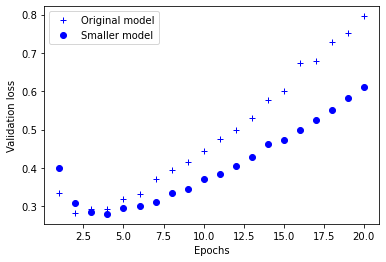

In [9]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

작은 네트워크가 기본 네트워크보다 더 나중에 과대적합되기 시작

훨씬 더 많은 용량을 가진 네트워크를 비교해보자

In [10]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [11]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 25s 486ms/step - loss: 0.5131 - acc: 0.7924 - val_loss: 0.3323 - val_acc: 0.8548
Epoch 2/20
49/49 [==============================] - 21s 439ms/step - loss: 0.2249 - acc: 0.9103 - val_loss: 0.3100 - val_acc: 0.8738
Epoch 3/20
49/49 [==============================] - 20s 405ms/step - loss: 0.1241 - acc: 0.9565 - val_loss: 0.3407 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 20s 409ms/step - loss: 0.0789 - acc: 0.9834 - val_loss: 0.4174 - val_acc: 0.8800
Epoch 5/20
49/49 [==============================] - 20s 412ms/step - loss: 0.0486 - acc: 0.9923 - val_loss: 2.1331 - val_acc: 0.6640
Epoch 6/20
49/49 [==============================] - 20s 410ms/step - loss: 0.0150 - acc: 0.9965 - val_loss: 0.6423 - val_acc: 0.8832
Epoch 7/20
49/49 [==============================] - 22s 449ms/step - loss: 7.1240e-05 - acc: 1.0000 - val_loss: 0.9742 - val_acc: 0.8659
Epoch 8/20
49/49 [==============================] - 23s 476ms/ste

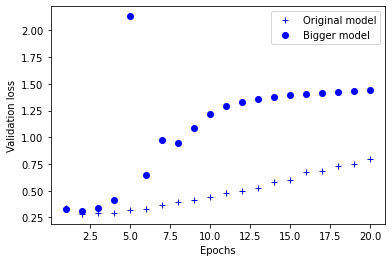

In [12]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

용량이 큰 네트워크는 첫번째 에포크 이후 거의 바로 과대적합이 시작 --> 검증 손실도 또한 매우 불안정

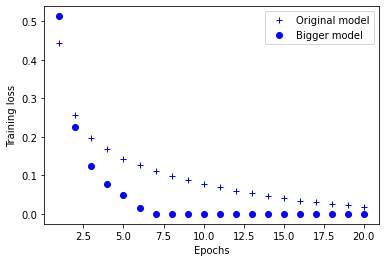

In [13]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

용량이 큰 네트워크는 훈련 손실이 매우 빠르게 0에 가까워진다. 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링할 수 있다.그러나 더욱 과대적합에는 민감해진다. 

## 가중치 규제 추가

### 오캄의 면도날 이론: 어떤 것에 대한 두 가지의 설명이 있다면 더 적은 가정을 필요하는 간단한 설명이 옳을 것이라는 이론

--> 신경망 학습 모델에도 적용: 어떤 훈련 데이터와 네트워크 구조가 주어졌을 때 데이터를 설명할 수 있는 가중치 값의 집합은 여래개입니다. 간단한 모델이 복잡한 모델보다 덜 과대적합될 가능성이 높다. 

여기서 간단한 모델이란 파라미터 값의 분포의 엔트로피가 작은모델이다. 그러므로 과대적합을 완화시키는 일반적인 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제화하는 것 --> 가중치 값의 분포는 균일해진다. 
-->이를 가중치 규제라고 한다. 
- L1 규제: 가중치의 절대값에 비례하는 비용을 추가 
- L2 규제: 가중치의 제곱에 비례하는 비용을 추가 (=가중치 감쇠)

>L2 가중치 규제를 추가한 예제(영화리뷰 분류)

In [14]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2(0.001): 가중치 행렬의 모든 원소를  제곱하고 0.001을 곱하여 네트워크의 전체 손실에 더해진다. 

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 87ms/step - loss: 0.4946 - acc: 0.8216 - val_loss: 0.3758 - val_acc: 0.8832
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3102 - acc: 0.9082 - val_loss: 0.3482 - val_acc: 0.8764
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2643 - acc: 0.9229 - val_loss: 0.3301 - val_acc: 0.8863
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2439 - acc: 0.9299 - val_loss: 0.3334 - val_acc: 0.8869
Epoch 5/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2318 - acc: 0.9348 - val_loss: 0.3676 - val_acc: 0.8722
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2241 - acc: 0.9372 - val_loss: 0.3538 - val_acc: 0.8796
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2167 - acc: 0.9410 - val_loss: 0.3713 - val_acc: 0.8756
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2125 - a

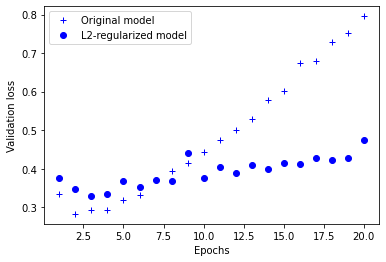

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## l1(0.0001) 모델과 비교

In [18]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
48/49 [============================>.] - ETA: 0s - loss: 0.5879 - acc: 0.8026

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## l1(0.0001) l2(0.0001)모델 비교

In [ ]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [ ]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

In [ ]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 드롭아웃 추가
신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법 중 하나
네트워크 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층을 일부 출력 특성을 제외

테스트 단계에서는 어떤 유닛도 드롭아웃되지 않는다. 대신에 층의 출력을 드롭아웃 비율에 비례하여 줄여준다. 훈련할 때보다 더 많은 유닛이 활성화되기 때문

### 신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법
- 훈련 데이터를 더 모은다. 
- 네트워크 용량을 감소시킨다. 
- 가중치 규제를 추가한다.
- 드롭아웃을 추가한다. 